In [1]:


import os
# os.environ["CUDA_VISIBLE_DEVICES"]="4"
import sys


In [2]:
from samay.model import ChronosModel
from samay.dataset import ChronosDataset
from samay.visualization import ForecastVisualization

/localscratch/hkamarthi3/Samay/.venv/lib/python3.12/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


In [3]:
train_dataset = ChronosDataset(name="ett", mode="train", path='../data/data/ETTh1.csv', datetime_col='date', freq='h', context_len=128, horizon_len=64)
test_dataset = ChronosDataset(name="ett", mode="test", path='../data/data/ETTh1.csv', datetime_col='date', freq='h', context_len=128, horizon_len=64)

print(len(test_dataset.dataset))
# print(test_dataset.dataset.shape)

52


In [4]:
repo = "amazon/chronos-t5-small"
ch = ChronosModel(config=None, repo=repo)
ch.load_model()


In [5]:
eval_results, trues, preds, histories = ch.evaluate(test_dataset, batch_size=8, metrics=["MSE", "MASE"])
print(eval_results)
# visualization = ForecastVisualization(trues, preds[:,:,1,:], histories)
# visualization.plot()

{'MSE': np.float32(0.6266383), 'MASE': np.float32(1.7211615)}


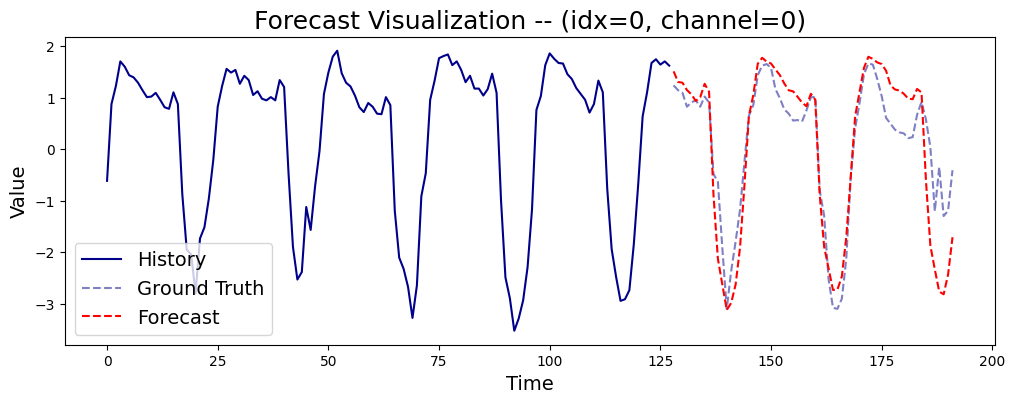

In [6]:
visualization = ForecastVisualization(trues, preds, histories)
visualization.plot(channel_idx=0, time_idx=0)

In [ ]:
# ch.finetune(train_dataset)


The speedups for torchdynamo mostly come wih GPU Ampere or higher and which is not detected here.


In [8]:
# latest_run_dir = ch.get_latest_run_dir()
# model_dir = os.path.join(latest_run_dir, "checkpoint-final")
# model_type = "seq2seq"
# model = ch.load_model(model_dir, model_type)

INFO:results_logger:Model loaded from /nethome/abhalerao9/TIMESERIESMODELING/TSFMProject/src/./tsfmproject/models/chronosforecasting/output/finetuning/run-12/checkpoint-final


In [9]:
# eval_results, trues, preds, histories = ch.evaluate(test_dataset, batch_size=8, metrics=["MSE", "MASE"])
# print(eval_results)

{'MSE': 0.5772213, 'MASE': 1.6072242}


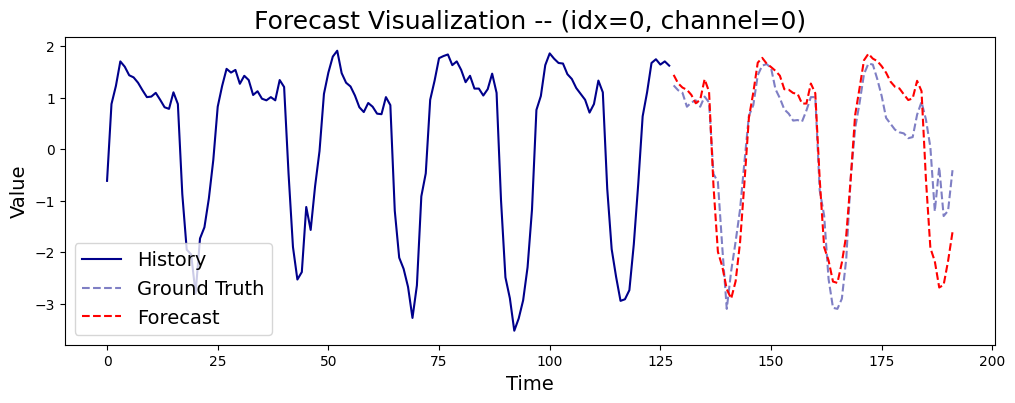

In [ ]:
# visualization = ForecastVisualization(trues, preds, histories)
# visualization.plot(channel_idx=0, time_idx=0)